Importing the Required Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler , LabelEncoder
from imblearn.over_sampling import SMOTE


Loading the Dataset

In [20]:
dataset = pd.read_csv('clean_data.csv')

Printing the dataset

In [21]:
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.000000,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.000000,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.000000,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.000000,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.000000,29.0,125.0,32.3,0.232,54,1


Descriptive statistics of the data set accessed.

In [22]:
dataset.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
10%,0.000000,86.700000,58.000000,18.000000,67.000000,24.000000,0.165000,22.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000,1.000000
95%,10.000000,181.000000,90.000000,44.000000,293.000000,44.395000,1.132850,58.000000,1.000000


Check the null value in dataset

In [23]:
dataset.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


Separeate the dependent and independent variable

In [24]:
# Data Preprocessing
# Split the Data into features and Target
X = dataset.drop('Outcome', axis=1)
y = dataset.Outcome

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Feature Scalling

Plotting the histogram for all parameters
1. Age

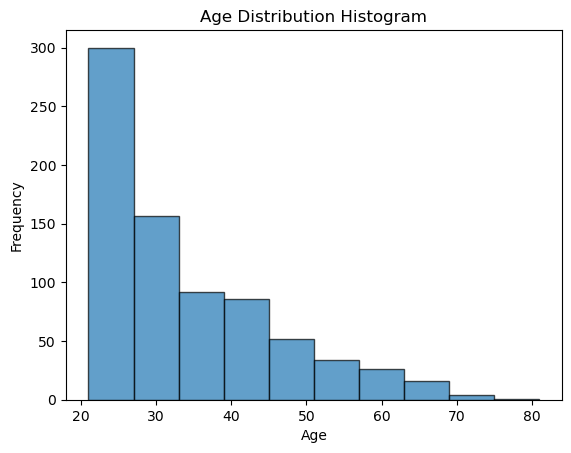

In [25]:
ages = dataset['Age']
# Plot the histogram
plt.hist(ages, bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')
plt.show()

2. Pregnancies

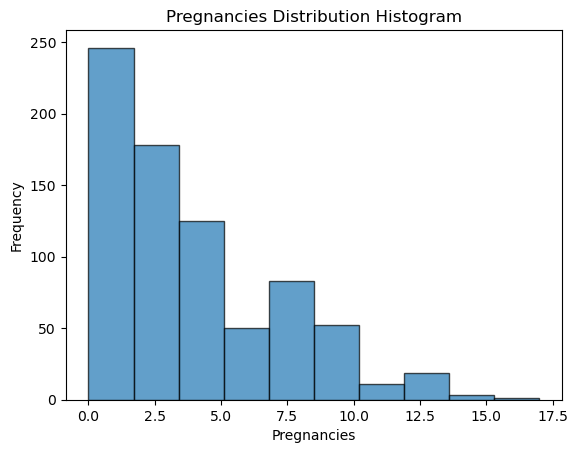

In [26]:
ages = dataset['Pregnancies']
# Plot the histogram
plt.hist(ages, bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.title('Pregnancies Distribution Histogram')
plt.show()

3. Glucose

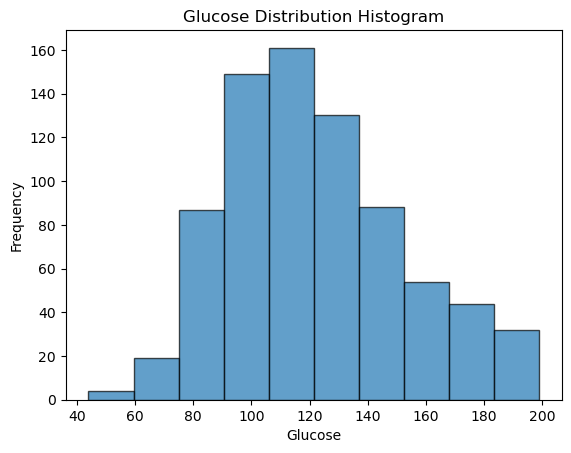

In [27]:
ages = dataset['Glucose']
# Plot the histogram
plt.hist(ages, bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Glucose Distribution Histogram')
plt.show()

BloodPressure	

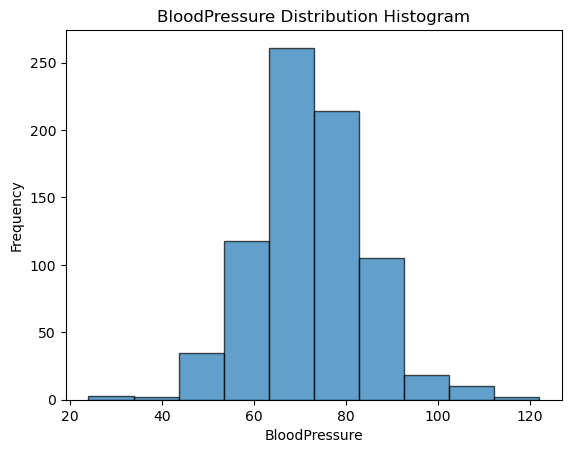

In [28]:
blood = dataset['BloodPressure']
# Plot the histogram
plt.hist(blood, bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.title('BloodPressure Distribution Histogram')
plt.show()

SkinThickness	

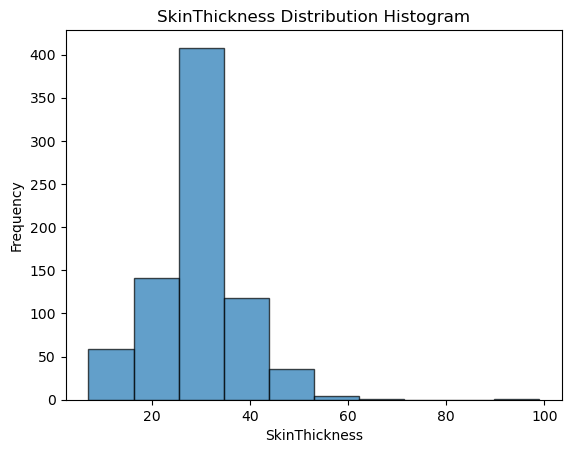

In [29]:
skin = dataset['SkinThickness']
# Plot the histogram
plt.hist(skin, bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.title('SkinThickness Distribution Histogram')
plt.show()

Insulin	

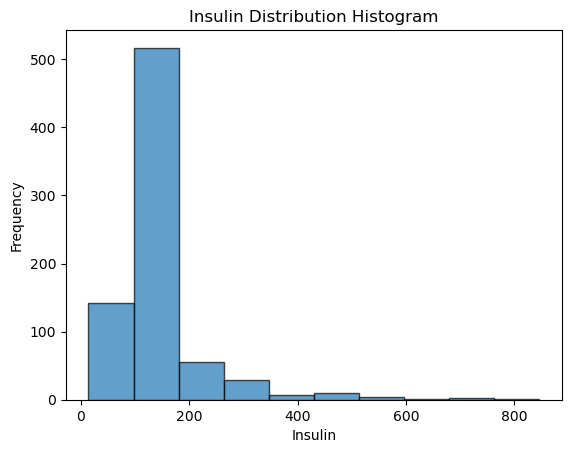

In [30]:
ages = dataset['Insulin']
# Plot the histogram
plt.hist(ages, bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Insulin Distribution Histogram')
plt.show()

BMI

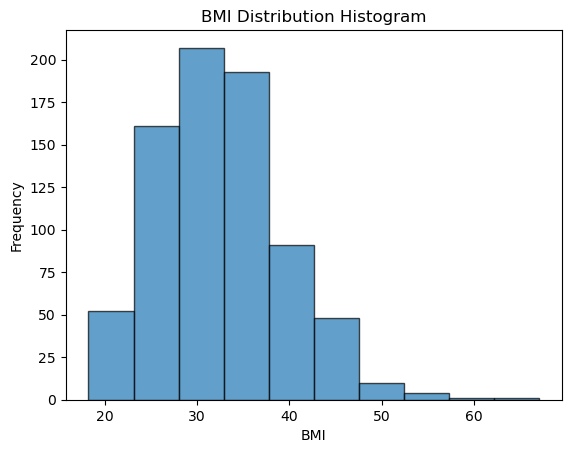

In [31]:
ages = dataset['BMI']
# Plot the histogram
plt.hist(ages, bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution Histogram')
plt.show()

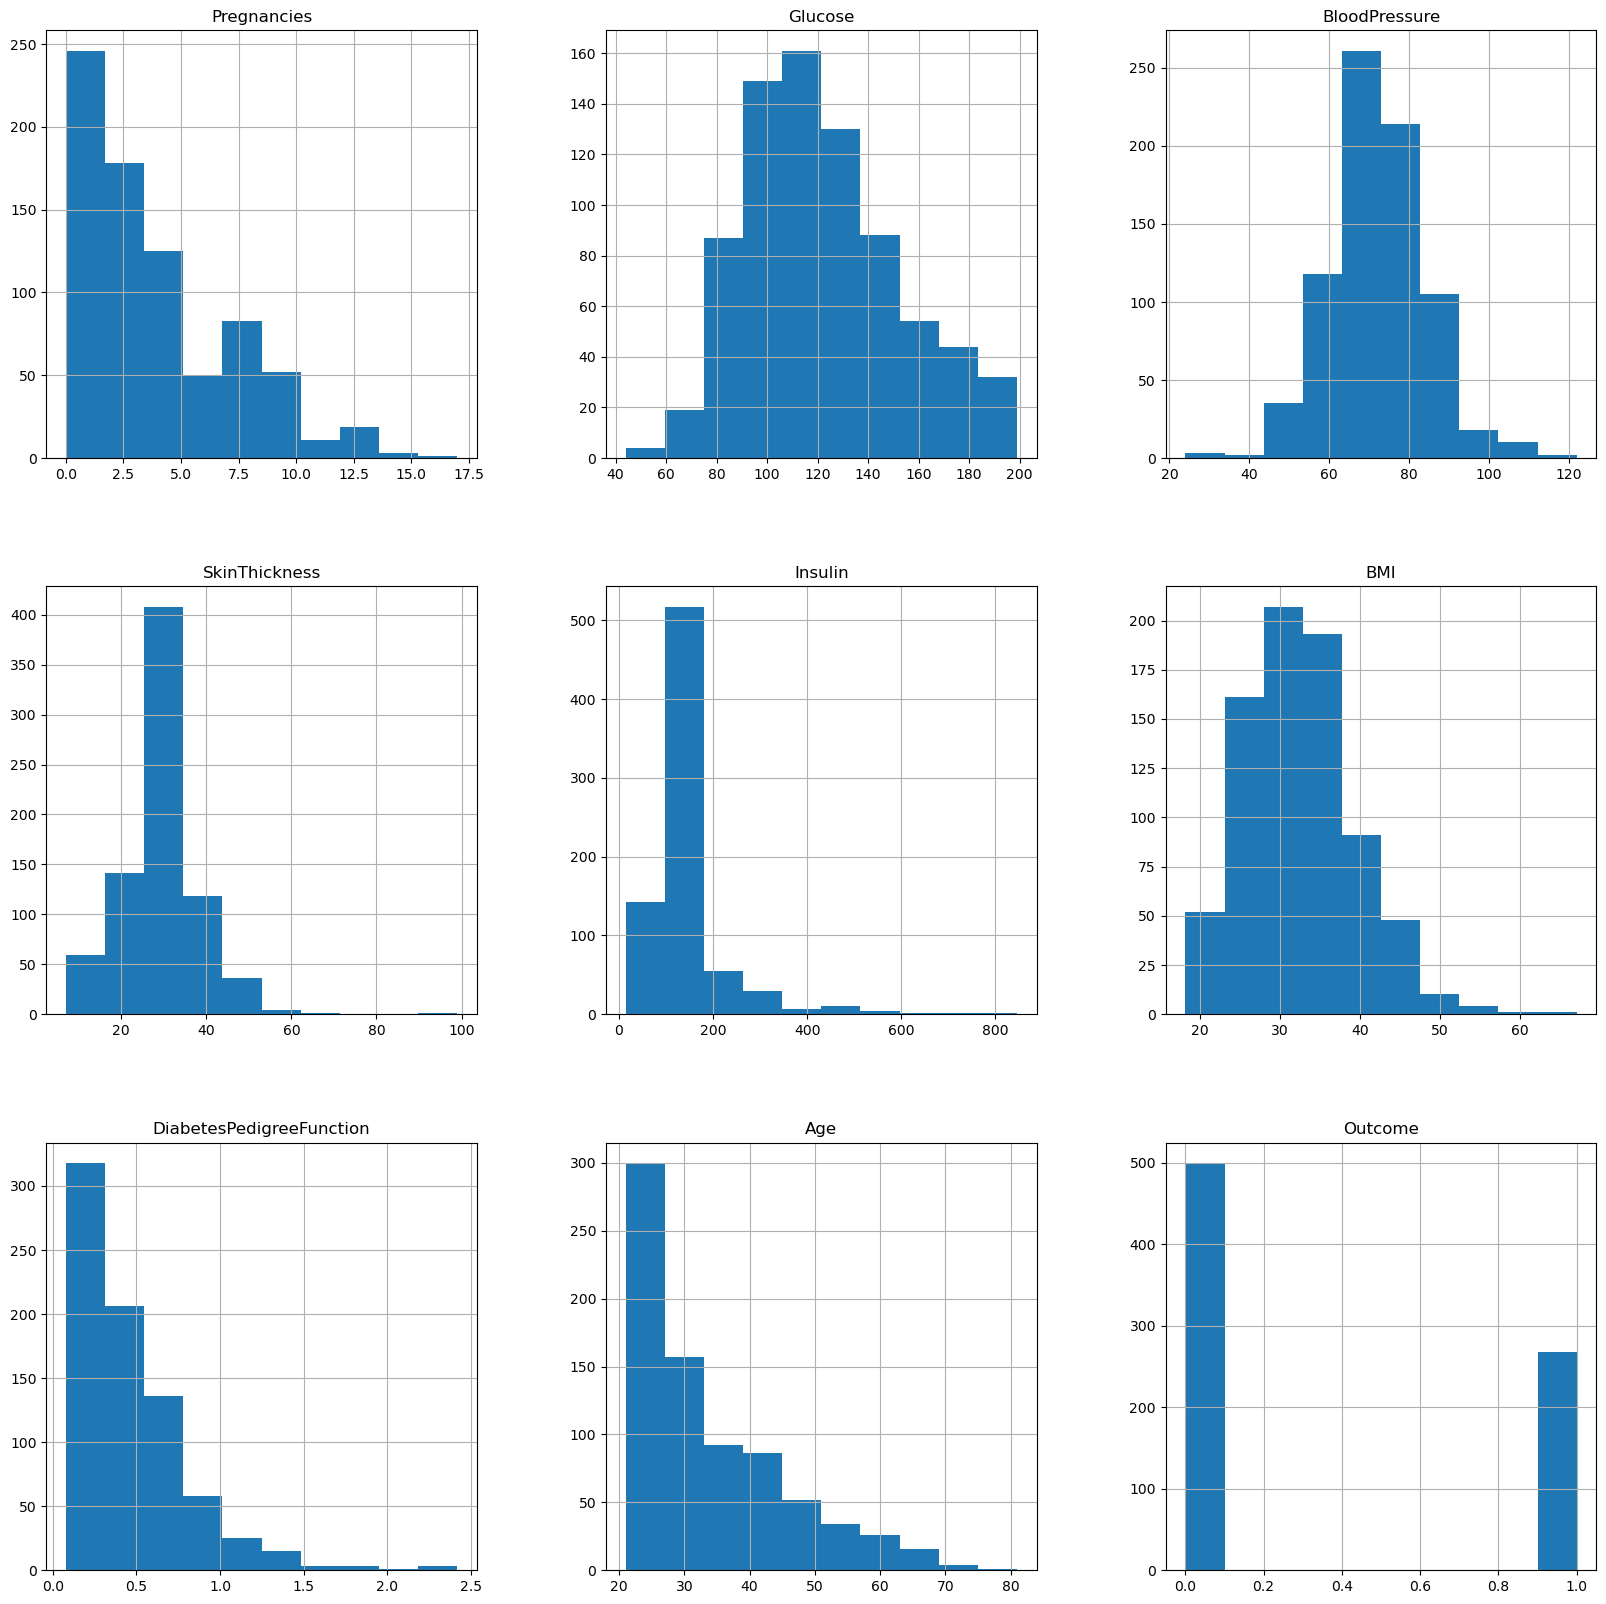

In [32]:
# Histogram of data
dataset.hist(figsize=(20,20))
plt.show()

Histogram and density graphs of all variables were accessed.

<Axes: xlabel='BMI', ylabel='Density'>

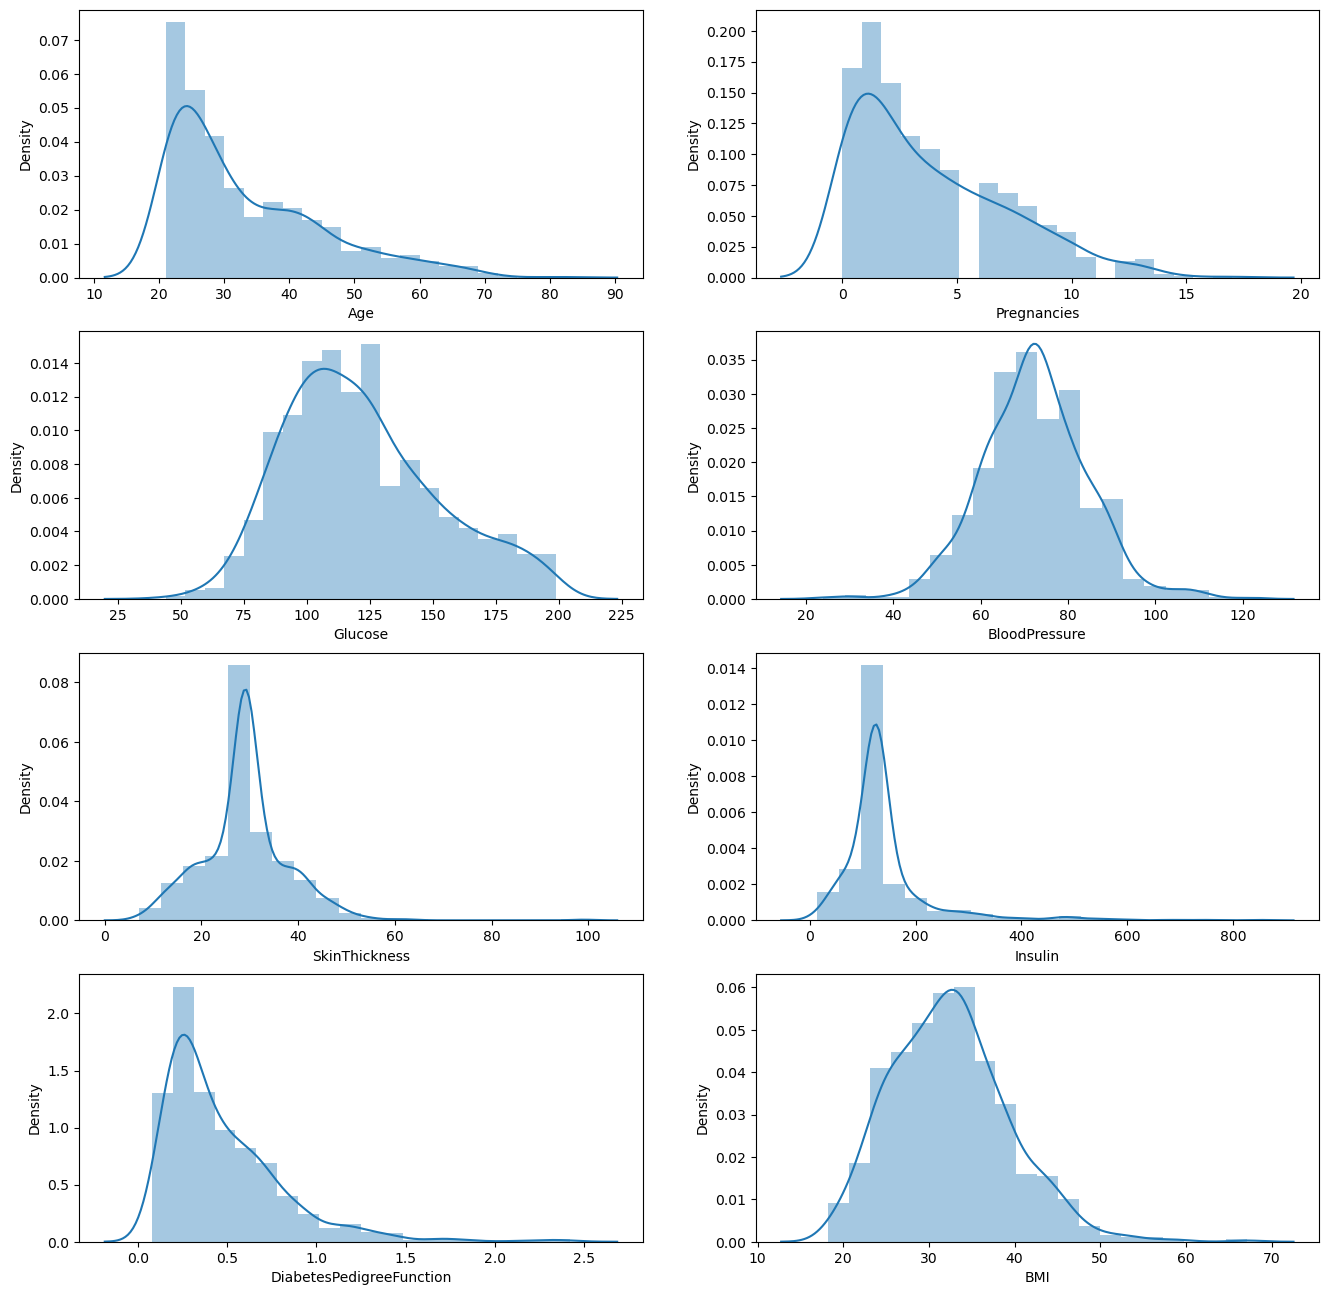

In [33]:

fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(dataset.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(dataset.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(dataset.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(dataset.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(dataset.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(dataset.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(dataset.BMI, bins = 20, ax=ax[3,1])

The distribution of the outcome variable in the data was examined and visualized.


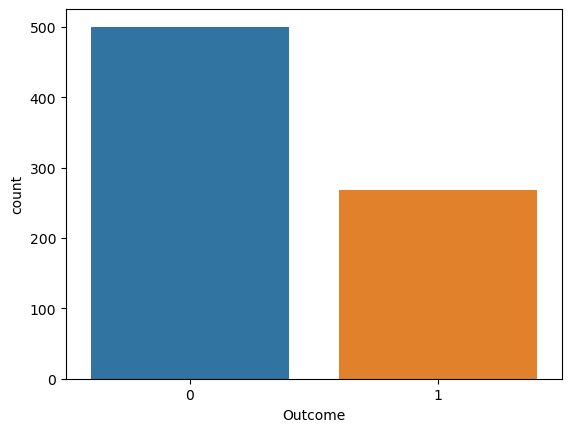

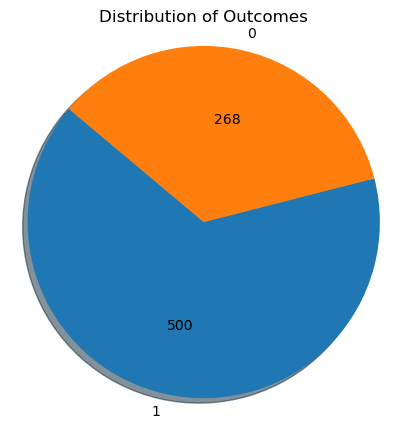

In [34]:
countplot_data = sns.countplot(x='Outcome', data=dataset)
total_count = len(dataset)
# Extract counts and categories from the countplot data
counts = [p.get_height() for p in countplot_data.patches]
categories = dataset['Outcome'].unique()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=categories, autopct=lambda p: f'{p * total_count / 100 :.0f}', startangle=140, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular.

# Set the chart title
plt.title('Distribution of Outcomes')

# Show the pie chart
plt.show()

Coorelation Matrix

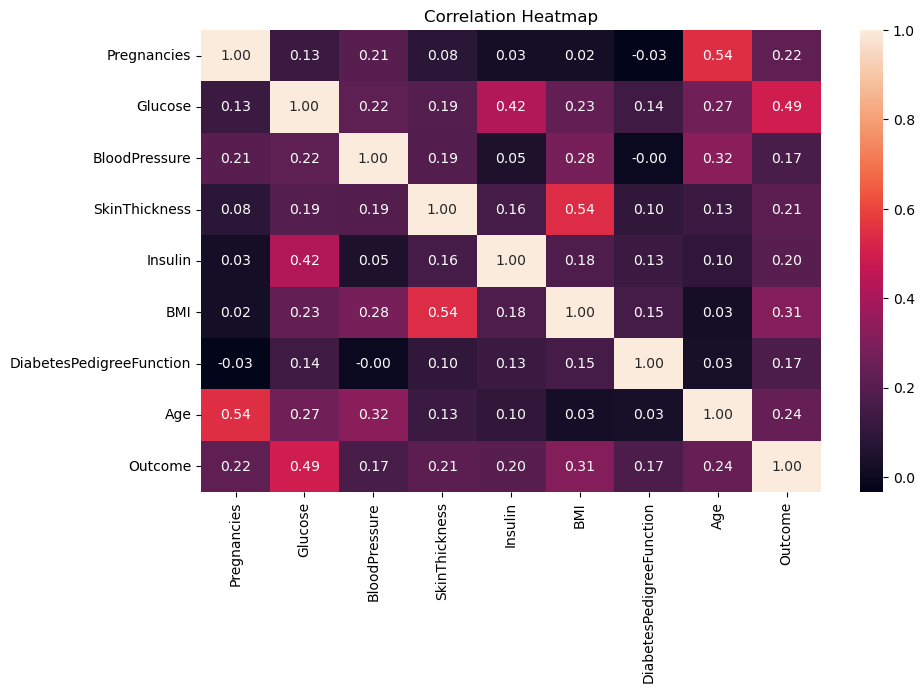

In [36]:
 correlation_matrix = dataset.corr()
# # Create a heatmap of the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
# plt.title('Correlation Matrix')
# plt.show()
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Feature Scalling

In [37]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform SMOTE for class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


# Hyperparameter tuning using GridSearchCV

In [38]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2','elasticnet','none'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

In [39]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_

In [41]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [42]:
# Calculate and print the accuracy of the model
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy:", accuracy, "%")

Accuracy: 79.87 %


Make predictions with the best model

In [43]:
# Make predictions with the best model
y_pred = best_model.predict(X_test_scaled)

In [44]:
# Evaluate the model
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy:", accuracy, "%")

Accuracy: 81.82 %


Generating classification report

In [45]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.81      0.85        97\n           1       0.72      0.82      0.77        57\n\n    accuracy                           0.82       154\n   macro avg       0.81      0.82      0.81       154\nweighted avg       0.83      0.82      0.82       154\n'

Make the Prediction

In [46]:
# Predict the condition for individual person
# 1,115,70,30,96,34.6,0.529,32,1
individual = pd.DataFrame({
    'Pregnancies': [1],
    'Glucose': [115],
    'BloodPressure': [70],
    'SkinThickness': [30],
    'Insulin': [96],
    'BMI': [34.6],
    'DiabetesPedigreeFunction': [0.529],
    'Age': [32]
})

# Handle missing values and scaling
# individual = preprocess_individual_data(individual)

individual_report = best_model.predict(individual)
if individual_report == 0:
    print('congrats... You\'re allowed to eat sweets!')
else:
    print('Time to take your diet into consideration, Champ!')

Time to take your diet into consideration, Champ!


In [47]:
model.predict([[6,148,72,35,0,33.6,0.627,50]])

array([1], dtype=int64)

In [48]:
model.predict([[1,85,66,29,0,26.6,0.351,31]])

array([0], dtype=int64)

In [49]:
model.predict([[1,89,66,23,94,28.1,0.167,21]])

array([0], dtype=int64)